In [54]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [55]:
train_images.shape


(60000, 28, 28)

In [56]:
len(train_labels)

60000

In [57]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [58]:
test_images.shape

(10000, 28, 28)

In [59]:
len(test_labels)

10000

In [60]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [61]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(10, activation = 'softmax'))

In [62]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [63]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [64]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [65]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [66]:
history = network.fit(partial_x_train, partial_y_train, epochs = 15, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/15
391/391 [==============================] - 1s 3ms/step - loss: 0.3163 - accuracy: 0.9078 - val_loss: 0.1786 - val_accuracy: 0.9470
Epoch 2/15
391/391 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.9629 - val_loss: 0.1259 - val_accuracy: 0.9628
Epoch 3/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.9752 - val_loss: 0.0936 - val_accuracy: 0.9707
Epoch 4/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0799 - val_accuracy: 0.9762
Epoch 5/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0780 - val_accuracy: 0.9775
Epoch 6/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0848 - val_accuracy: 0.9757
Epoch 7/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0870 - val_accuracy: 0.9757
Epoch 

In [67]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 579us/step - loss: 0.1006 - accuracy: 0.9799
test_acc: 0.9799000024795532


In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

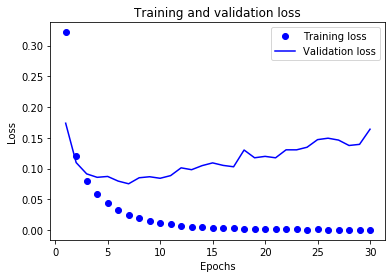

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

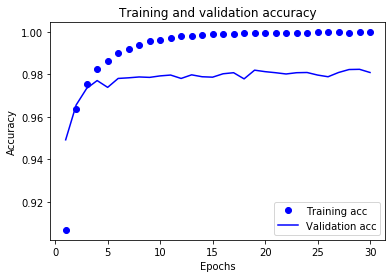

In [37]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()